sources are based on: https://github.com/AllenInstitute/MicronsBinder/tree/master/notebooks/mm3_intro 

# setting up workspace

In [1]:
from caveclient import CAVEclient
import pandas as pd
import numpy as np
import scipy.spatial as sci_spatial
from scipy.spatial import distance_matrix
from tqdm import tqdm
import csv
import pickle #how to use pickle: https://www.datacamp.com/tutorial/pickle-python-tutorial 
import utils
from nglui import statebuilder
import plotly.figure_factory as ff
import networkx as nx
from itertools import chain, combinations
from scipy.cluster.hierarchy import dendrogram
import random
import sklearn
from collections import defaultdict

client = CAVEclient()

/home/willcai/anaconda3/envs/ofs/lib/python3.7/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
# loading the saved results 
seqs_with_post_neuron_lst = utils.load_obj_from_filename('seqs_with_post_neuron_lst_5um')
syp_ids_of_seqs_with_post_neuron_lst = utils.load_obj_from_filename('syp_ids_of_seqs_with_post_neuron_lst_5um')

In [3]:
seq_keys = filter(lambda key: len(key)==4, seqs_with_post_neuron_lst)
for key in seq_keys:
    print([k%10000 for k in key], len(seqs_with_post_neuron_lst[key]))

[1706, 1706, 601, 1706] 1
[601, 601, 601, 8286] 1
[9209, 9209, 9209, 9209] 1
[9471, 9471, 9471, 9471] 1
[8652, 8652, 8652, 8652] 2
[3132, 3132, 3132, 3132] 1
[6156, 6156, 6156, 6156] 1
[4360, 4360, 4360, 4360] 1
[5732, 5732, 7417, 5732] 1
[7569, 7569, 7569, 7569] 1
[2956, 2956, 2956, 2956] 1
[6583, 6583, 3664, 3664] 1
[5732, 5732, 5732, 5732] 28
[5732, 5732, 5732, 7417] 1
[652, 652, 652, 652] 1
[8153, 8153, 8153, 8153] 2
[2258, 2258, 2258, 2258] 1
[4435, 4435, 4435, 4435] 1
[5437, 5437, 5437, 5437] 16
[6362, 6362, 6362, 6362] 1
[9983, 9983, 9983, 9983] 2


In [4]:
occurences = [len(seqs_with_post_neuron_lst[key]) for key in seqs_with_post_neuron_lst if len(key)==3]
occ_array = np.array(occurences)

In [5]:
import matplotlib.pyplot as plt
from matplotlib import ticker as mticker

ttl number of seqs with len3 = 104
ttl number of seqs with len4 = 21


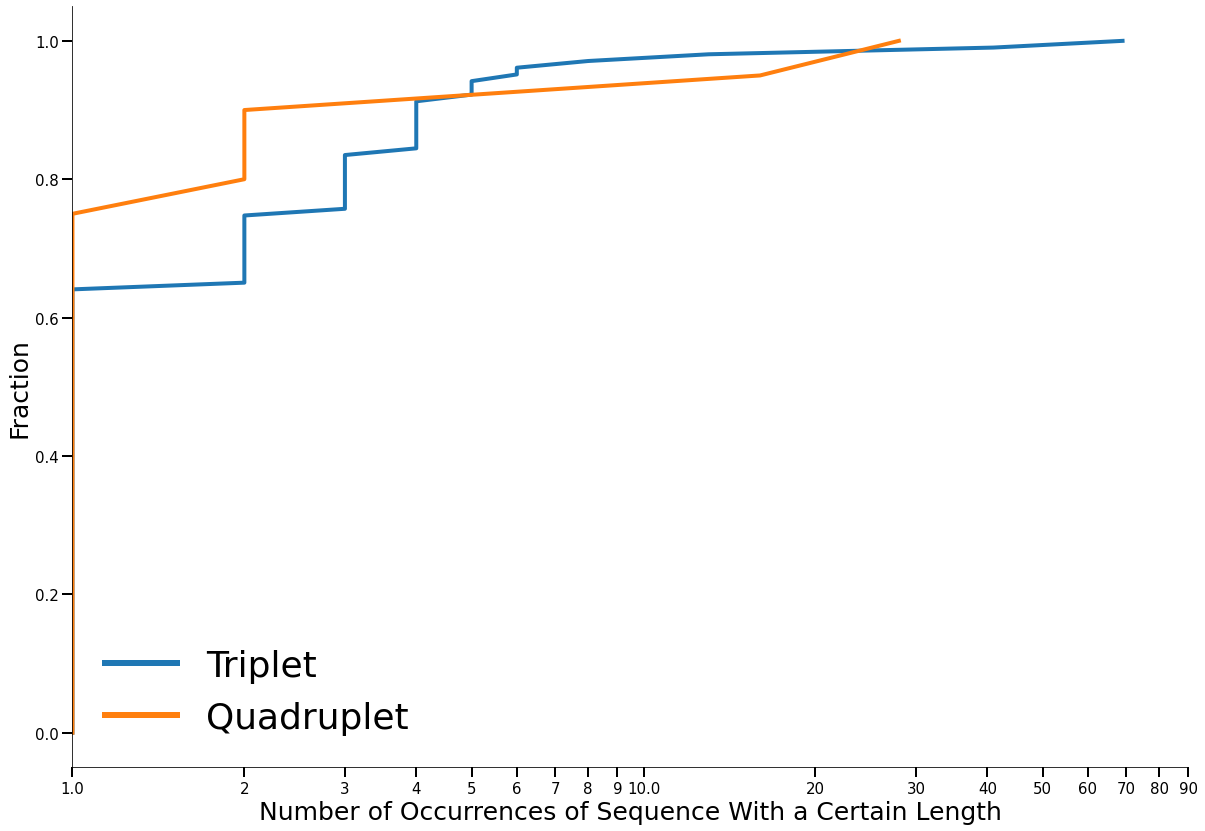

In [8]:
fig, ax = plt.subplots(figsize = (20,14))
ax.tick_params(axis='both', which='minor', labelsize=15, length=10, width=2)
ax.tick_params(axis='both', which='major', labelsize=15, length=10, width=2)
ax.tick_params(axis='y', which='minor', labelsize=24, length=5, width=2)
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

labels = ['Triplet', 'Quadruplet']
for count, i in enumerate(range(3, 5)):
    occurences = [len(seqs_with_post_neuron_lst[key]) for key in seqs_with_post_neuron_lst if len(key)==i]
    occ_array = np.array(occurences)
    print('ttl number of seqs with len' + str(i) + ' = ' + str(len(occ_array)))
    plt.plot(np.sort(occ_array), np.linspace(0, 1, len(occ_array), endpoint=True), label = labels[count], linewidth=4)
#     plt.ylim([0.5, 1])
    plt.xlim([1,90])
    plt.xscale("log")

leg = ax.legend()
leg = plt.legend(fontsize = 36, frameon=False)
leg.get_lines()[0].set_linewidth(6)
leg.get_lines()[1].set_linewidth(6)

ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())
ax.xaxis.get_minor_formatter().set_scientific(False)
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Number of Occurrences of Sequence With a Certain Length', fontsize = 25)
plt.ylabel('Fraction', fontsize = 25)

plt.savefig('kk', bbox_inches = 'tight')
plt.show()

In [ ]:
a_lst

In [ ]:
len(utils.get_seq_with_length_n_of_unique_keys_for_occur_more_than_m_times_w_type_lst(4, 0, seqs_with_post_neuron_lst))

In [ ]:
len(utils.get_seq_with_length_n_of_unique_keys_for_occur_more_than_m_times_w_type_lst(5, 0, seqs_with_post_neuron_lst))

In [ ]:
len_3_seq_morethan_1_time_w_post_neuron_lst = utils.get_seq_with_length_n_of_unique_keys_for_occur_more_than_m_times_w_type_lst(5, 0, seqs_with_post_neuron_lst)

In [ ]:
len_3_seq_morethan_1_time_w_syp_ids_lst = utils.get_seq_with_length_n_of_unique_keys_for_occur_more_than_m_times_w_type_lst(3, 0, syp_ids_of_seqs_with_post_neuron_lst)

In [ ]:
# url_collections = utils.neuroglancer_render(client, statebuilder, len_3_seq_morethan_1_time_w_post_neuron_lst, len_3_seq_morethan_1_time_w_syp_ids_lst)

In [ ]:
# url_collections_pd = pd.DataFrame([{'neurons': key, 'url':value} for key, value in url_collections.items()])
# url_collections_pd.to_csv('len_3_seq_all_uniqe_url_collections.csv')

In [ ]:
ns = np.round(np.logspace(np.log10(60), np.log10(480), 8, base=10)).astype(int)
cts = np.zeros((3,8,20))
for k,p in enumerate([3, 4, 5]):
    a_lst = utils.get_seq_with_length_n_of_unique_keys_for_occur_more_than_m_times_w_type_lst(p, 0, seqs_with_post_neuron_lst)
    for j, n in enumerate(ns):
        for i in range(20):
            sampled_neurons = random.sample(valid_ids, n)
            ct = 0 
            for elem in a_lst:
                ct += np.all([e in sampled_neurons for e in elem])
            cts[k,j,i] = ct


In [ ]:
cts[0].mean(axis=1)
# cts[1].mean(axis=1)
# cts[2].mean(axis=1)

In [ ]:
colors = ['tab:blue', 'tab:orange', 'tab:green']
for k,p in enumerate([3, 4, 5]):
    means = cts[k].mean(axis=1)
    stds = cts[k].std(axis=1)
    means_lower = np.clip(means - stds, 0, None)
    means_upper = means + stds
    plt.scatter(ns, means, color = colors[k])
    plt.fill_between(ns, means_lower, means_upper, alpha = 0.1)
plt.xscale('log')
plt.yscale('log')


In [ ]:
import sklearn